In [18]:
# Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [19]:
df = pd.read_csv("E:/CodeAlphaInternship/car data.csv")
df.head()  # Display the first few rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
df.shape  # Check the shape of the dataset
df.info()  # Get info about data types and non-null counts
df.describe()  # Summary statistics for numerical features
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [21]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())
print(df['Car_Name'].nunique())  # Number of unique car names (we may drop this due to high cardinality)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
98


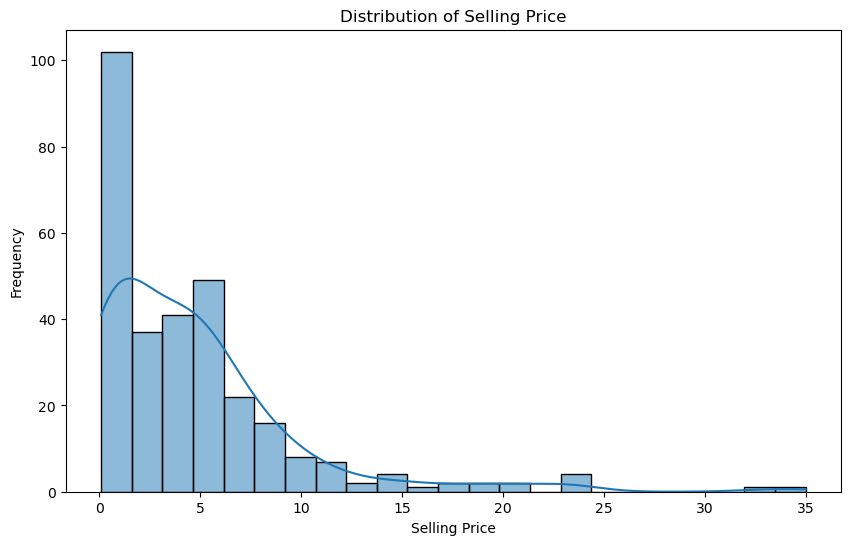

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

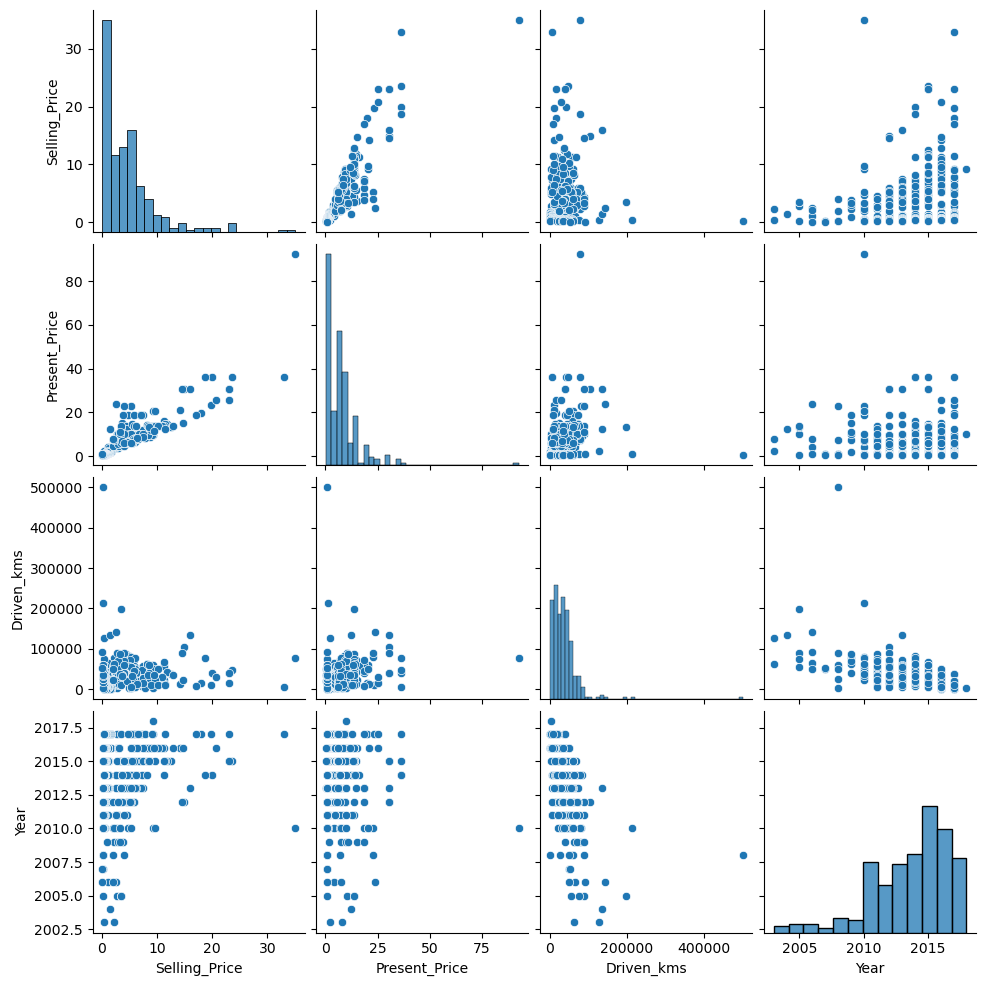

In [23]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Year']])
plt.show()

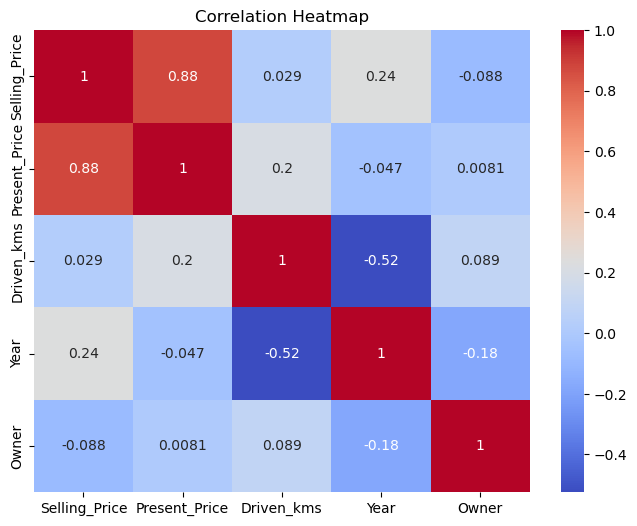

In [24]:
# Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Year', 'Owner']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
#Create Age variable
current_year = 2025
df['Age'] = current_year - df['Year']
df.drop('Year', axis=1, inplace=True)  # Drop the original Year column

In [26]:
df.drop('Car_Name', axis=1, inplace=True)

In [27]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
df.head()  # Check the updated dataframe

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [28]:
# Features
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Evaluation
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f'Linear Regression - MAE: {lr_mae:.2f}, MSE: {lr_mse:.2f}, R2: {lr_r2:.2f}')

Linear Regression - MAE: 1.22, MSE: 3.48, R2: 0.85


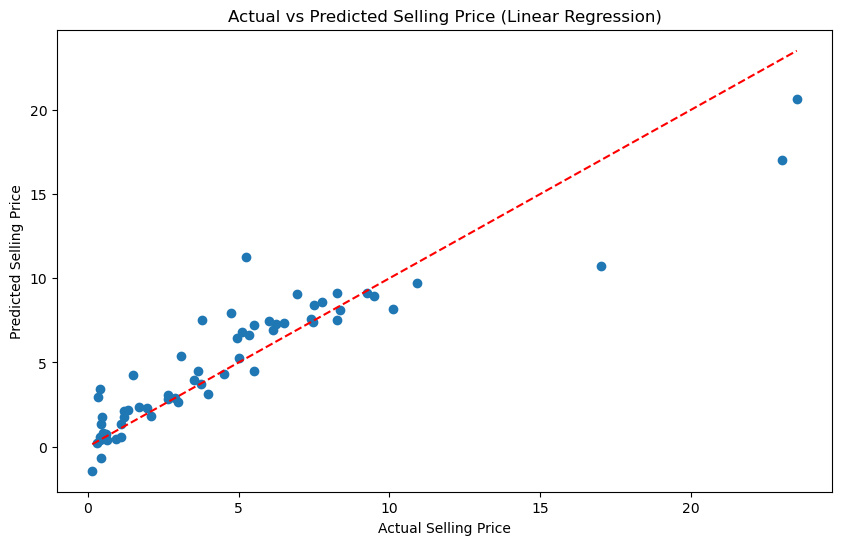

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Selling Price (Linear Regression)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

In [32]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest - MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}')

Random Forest - MAE: 0.64, MSE: 0.93, R2: 0.96


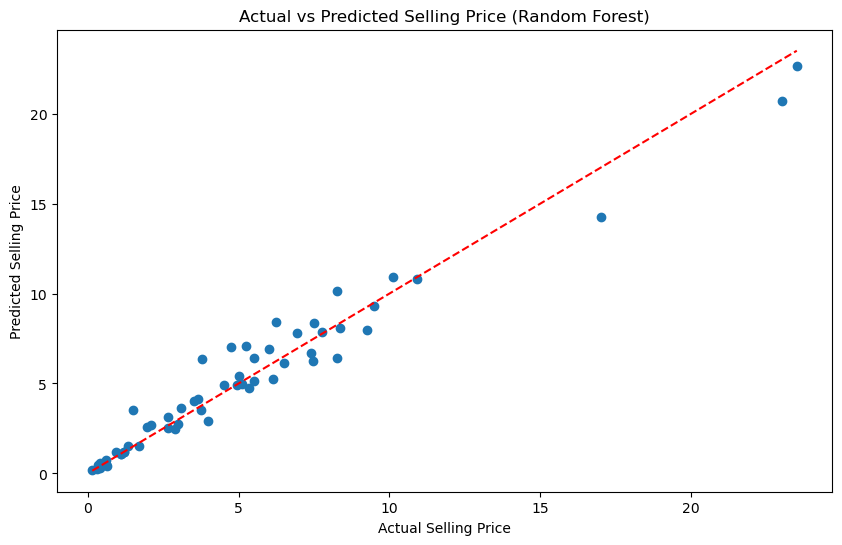

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Selling Price (Random Forest)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

In [35]:
# Save the Random Forest model
joblib.dump(rf_model, 'rf_car_price_model.pkl')
print("Random Forest model saved as  ->  rf_car_price_model.pkl")

# Save the scaler 
joblib.dump(scaler, 'car_price_scaler.pkl')
print("Scaler saved")

Random Forest model saved as  ->  rf_car_price_model.pkl
Scaler saved
